# Pitfalls - Fxp Arithmetic

We have confirmed the precision issues or input limitations with the following ops.

We will update this part promptly.

## Simulation

We will use SPU **simulation** tool to simulate multi-parties with threads.



In [1]:
import spu
import jax.numpy as jnp
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.dpi'] = 70

# import spu simulation module
import spu.utils.simulation as pps

Duplicate key in file PosixPath('/home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 271 ('font.sans-serif     : /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf')
Duplicate key in file '/home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc', line 271 ('font.sans-serif     : /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf')


## Default Runtime Config Parameters

We will use the following common settings in SPU Runtime config. Other parameters may be modified however.

In [3]:
DEFAULT_SPU_PROTOCOL = spu.ProtocolKind.SEMI2K
DEFAULT_SPU_FIELD = spu.FieldType.FM64
DEFAULT_SPU_FXP_FRACTION_BITS = 18

## Unary Operator

### Reciprocal

SPU uses Goldschmidt's method to calculate Reciprocal. Please refer to [Secure Computation With Fixed-Point Numbers](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.221.1305&rep=rep1&type=pdf) for details.

Reciprocal is only correct if input belongs to **(-2\*\*fxp_fraction_bits, 2\*\*fxp_fraction_bits)**.

First, let's have a look at the figure.

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

iter 1: 1/d=2.3250000000
iter 2: 1/d=3.0283125000
iter 3: 1/d=3.3054220207
iter 4: 1/d=3.3330996209
iter 5: 1/d=3.3333333169
iter 6: 1/d=3.3333333333
iter 7: 1/d=3.3333333333
iter 8: 1/d=3.3333333333
iter 9: 1/d=3.3333333333
iter 10: 1/d=3.3333333333


findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

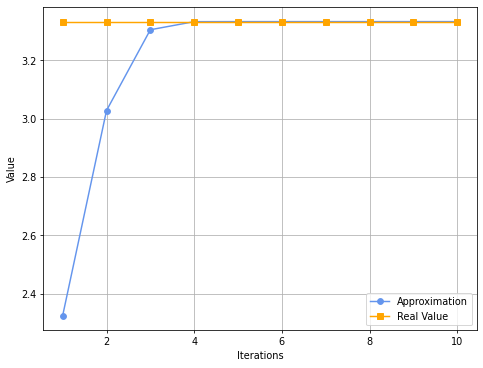

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# 定义迭代函数
def iterate(d, xn, num_iters):
    approximations = []
    real_values = []
    for i in range(1, num_iters + 1):
        xn = xn * (2 - xn * d)
        approximations.append(xn)
        real_values.append(1 / d)
        print("iter %d: 1/d=%.10f" % (i, xn))
    return approximations, real_values

# 定义参数
d = 0.3
xn = 1.5
num_iters = 10

# 进行迭代
approximations, real_values = iterate(d, xn, num_iters)

# 绘制迭代结果和真实值对比图
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iters + 1), approximations, marker='o', linestyle='-', color='cornflowerblue', label='Approximation')
plt.plot(range(1, num_iters + 1), real_values, marker='s', linestyle='-', color='orange', label='Real Value')
plt.xlabel('Iterations')
plt.ylabel('Value')
# plt.title('Comparison between Iterative Approximation and Real Value')
plt.legend()
plt.grid(True)
plt.savefig('reci_approx.pdf',format="pdf")
plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf


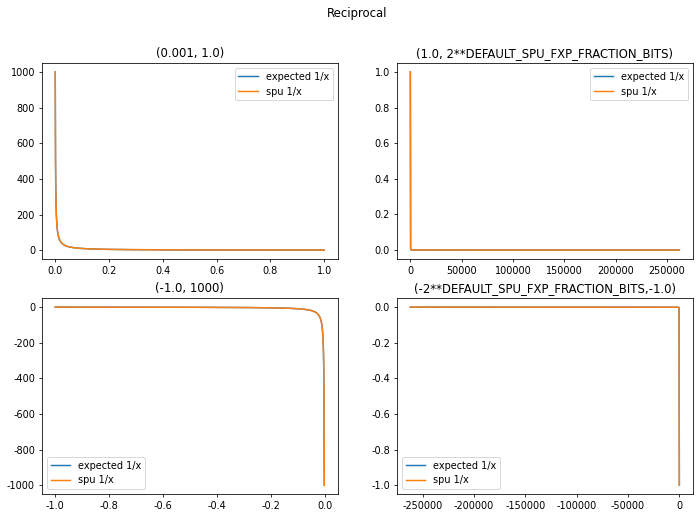

In [9]:
config = spu.RuntimeConfig(
    protocol=DEFAULT_SPU_PROTOCOL,
    field=DEFAULT_SPU_FIELD,
    fxp_fraction_bits=DEFAULT_SPU_FXP_FRACTION_BITS,
)
simulator = pps.Simulator(3, config)
spu_reciprocal = pps.sim_jax(simulator, jnp.reciprocal)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Reciprocal")


def plot_reciprocal(spu_reciprocal, ax, x, title):
    (line1,) = ax.plot(x, 1.0 / x, label='expected 1/x')
    (line2,) = ax.plot(x, spu_reciprocal(x), label='spu 1/x')
    ax.legend()
    ax.title.set_text(title)


plot_reciprocal(spu_reciprocal, ax1, np.linspace(0.001, 1.0, num=1000), '(0.001, 1.0)')
plot_reciprocal(
    spu_reciprocal,
    ax2,
    np.linspace(1.0, 2**DEFAULT_SPU_FXP_FRACTION_BITS - 1, num=1000),
    '(1.0, 2**DEFAULT_SPU_FXP_FRACTION_BITS)',
)
plot_reciprocal(
    spu_reciprocal, ax3, np.linspace(-1.0, -0.001, num=1000), '(-1.0, 1000)'
)
plot_reciprocal(
    spu_reciprocal,
    ax4,
    np.linspace(-(2**DEFAULT_SPU_FXP_FRACTION_BITS) + 1, -1.0, num=1000),
    '(-2**DEFAULT_SPU_FXP_FRACTION_BITS,-1.0)',
)
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

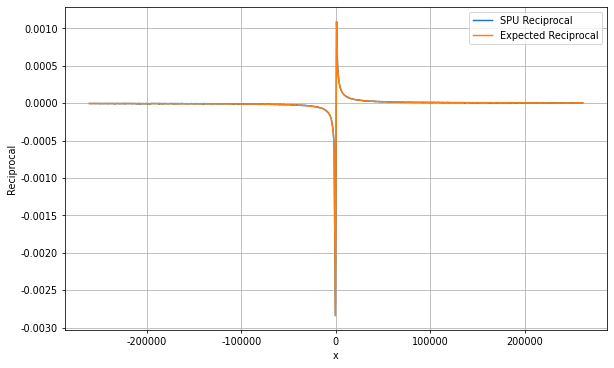

In [14]:
import time
config = spu.RuntimeConfig(
    protocol=DEFAULT_SPU_PROTOCOL,
    field=DEFAULT_SPU_FIELD,
    fxp_fraction_bits=DEFAULT_SPU_FXP_FRACTION_BITS,
)
simulator = pps.Simulator(3, config)
spu_reciprocal = pps.sim_jax(simulator, jnp.reciprocal)

# Define the range of x values
x_min = -(2 ** DEFAULT_SPU_FXP_FRACTION_BITS) + 1
x_max = 2 ** DEFAULT_SPU_FXP_FRACTION_BITS - 1

# Sample random points within the specified range
num_samples = 1000
x_values = np.random.uniform(low=x_min, high=x_max, size=num_samples)

# Compute SPU reciprocal values and expected reciprocal values
spu_reciprocal_values = spu_reciprocal(x_values)
expected_values = 1.0 / x_values

# Sort x_values and corresponding reciprocal values
sorted_indices = np.argsort(x_values)
x_values_sorted = x_values[sorted_indices]
spu_reciprocal_values_sorted = spu_reciprocal_values[sorted_indices]
expected_values_sorted = expected_values[sorted_indices]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values_sorted, spu_reciprocal_values_sorted, label='SPU Reciprocal')
plt.plot(x_values_sorted, expected_values_sorted, label='Expected Reciprocal')
# plt.title("Reciprocal Comparison")
plt.xlabel("x")
plt.ylabel("Reciprocal")
plt.legend()
plt.grid(True)
plt.savefig("exp-precision.pdf",format="pdf")
plt.show()

In [ ]:
def f(d):
#     x=1
    print("ok1")
    for i in range(1,3):
        if i == 1:
            xn = 1
        m = 2-d
        xn = xn * m
        d = d * m
    print("ok2")
    return x

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

ok1
ok2
ok1
ok2
ok1
ok2
ok1
ok2


findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

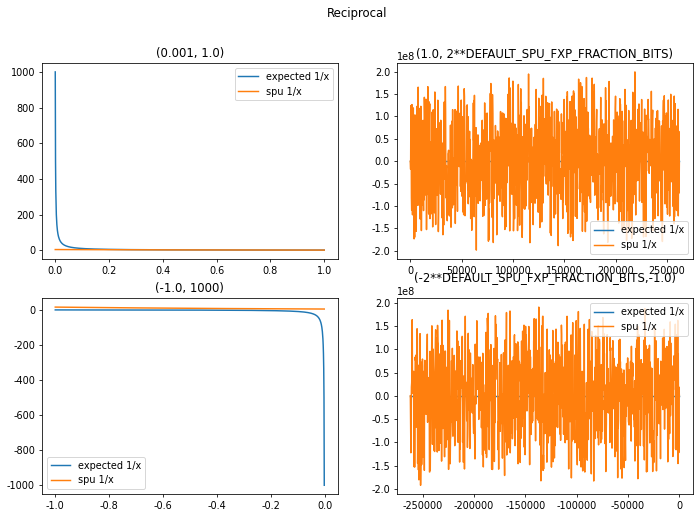

In [8]:
def f(d):
#     x=1
    print("ok1")
    for i in range(1,3):
        if i == 1:
            xn = 1
        m = 2-d
        xn = xn * m
        d = d * m
    print("ok2")
    return xn
    
config = spu.RuntimeConfig(
    protocol=DEFAULT_SPU_PROTOCOL,
    field=DEFAULT_SPU_FIELD,
    fxp_fraction_bits=DEFAULT_SPU_FXP_FRACTION_BITS,
)
simulator = pps.Simulator(3, config)
spu_reciprocal = pps.sim_jax(simulator, f)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Reciprocal")


def plot_reciprocal(spu_reciprocal, ax, x, title):
    (line1,) = ax.plot(x, 1.0 / x, label='expected 1/x')
    (line2,) = ax.plot(x, spu_reciprocal(x), label='spu 1/x')
    ax.legend()
    ax.title.set_text(title)


plot_reciprocal(spu_reciprocal, ax1, np.linspace(0.001, 1.0, num=1000), '(0.001, 1.0)')
plot_reciprocal(
    spu_reciprocal,
    ax2,
    np.linspace(1.0, 2**DEFAULT_SPU_FXP_FRACTION_BITS - 1, num=1000),
    '(1.0, 2**DEFAULT_SPU_FXP_FRACTION_BITS)',
)
plot_reciprocal(
    spu_reciprocal, ax3, np.linspace(-1.0, -0.001, num=1000), '(-1.0, 1000)'
)
plot_reciprocal(
    spu_reciprocal,
    ax4,
    np.linspace(-(2**DEFAULT_SPU_FXP_FRACTION_BITS) + 1, -1.0, num=1000),
    '(-2**DEFAULT_SPU_FXP_FRACTION_BITS,-1.0)',
)
plt.show()
    

Actually the precision is quite high.

In [4]:
x = np.linspace(
    -(2**DEFAULT_SPU_FXP_FRACTION_BITS) + 1,
    2**DEFAULT_SPU_FXP_FRACTION_BITS - 1,
    num=1000,
)
expected_y = 1.0 / x
y = spu_reciprocal(x)

assert np.allclose(y, expected_y, rtol=1e-04, atol=1e-5)

Let's have an idea about what happens if input is not within the valid range.

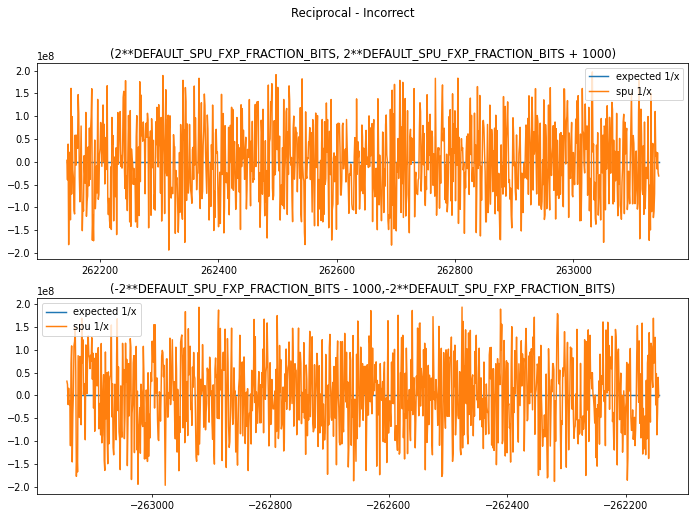

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
fig.suptitle("Reciprocal - Incorrect")


def plot_reciprocal(spu_reciprocal, ax, x, title):
    (line1,) = ax.plot(x, 1.0 / x, label='expected 1/x')
    (line2,) = ax.plot(x, spu_reciprocal(x), label='spu 1/x')
    ax.legend()
    ax.title.set_text(title)


plot_reciprocal(
    spu_reciprocal,
    ax1,
    np.linspace(
        2**DEFAULT_SPU_FXP_FRACTION_BITS,
        2**DEFAULT_SPU_FXP_FRACTION_BITS + 1000,
        num=1000,
    ),
    '(2**DEFAULT_SPU_FXP_FRACTION_BITS, 2**DEFAULT_SPU_FXP_FRACTION_BITS + 1000)',
)

plot_reciprocal(
    spu_reciprocal,
    ax2,
    np.linspace(
        -(2**DEFAULT_SPU_FXP_FRACTION_BITS) - 1000,
        -(2**DEFAULT_SPU_FXP_FRACTION_BITS),
        num=1000,
    ),
    '(-2**DEFAULT_SPU_FXP_FRACTION_BITS - 1000,-2**DEFAULT_SPU_FXP_FRACTION_BITS)',
)
plt.show()

### Natural Logarithm

SPU uses Pade approximation by default. Please check [Benchmarking Privacy Preserving Scientific Operations](https://www.esat.kuleuven.be/cosic/publications/article-3013.pdf) for details.

Logarithm is only correct if input belongs to **(0, 2\*\*fxp_fraction_bits)**.

> **_NOTE:_**  Similar conclusion also applies to **log1p**, **log2**.

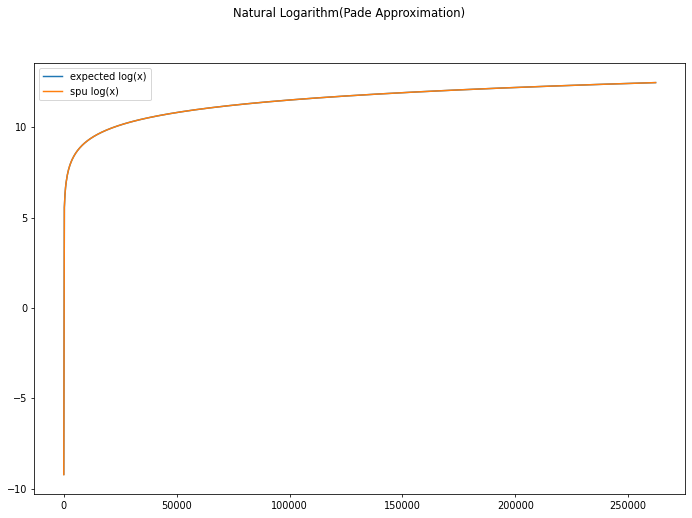

In [6]:
config = spu.RuntimeConfig(
    protocol=DEFAULT_SPU_PROTOCOL,
    field=DEFAULT_SPU_FIELD,
    fxp_fraction_bits=DEFAULT_SPU_FXP_FRACTION_BITS,
)
simulator = pps.Simulator(3, config)

spu_log = pps.sim_jax(simulator, jnp.log)
x = np.linspace(0.0001, 2**DEFAULT_SPU_FXP_FRACTION_BITS - 1, num=1000)
expected_y = np.log(x)
y = spu_log(x)

fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle("Natural Logarithm(Pade Approximation)")
(line1,) = ax.plot(x, expected_y, label='expected log(x)')
(line2,) = ax.plot(x, y, label='spu log(x)')
ax.legend()
plt.show()

In [7]:
assert np.allclose(y, expected_y, rtol=1e-3, atol=1e-5)

Again, let's see what happens if input is out of valid range.

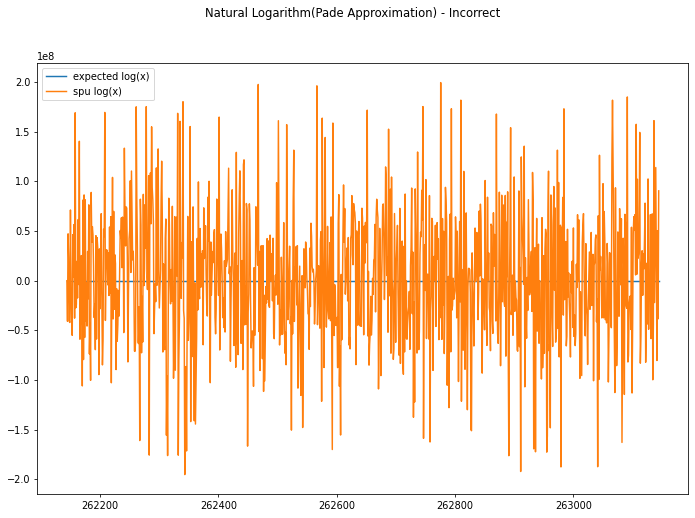

In [8]:
x = np.linspace(
    2**DEFAULT_SPU_FXP_FRACTION_BITS,
    2**DEFAULT_SPU_FXP_FRACTION_BITS + 1000,
    num=1000,
)
expected_y = np.log(x)
y = spu_log(x)

fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle("Natural Logarithm(Pade Approximation) - Incorrect")
(line1,) = ax.plot(x, expected_y, label='expected log(x)')
(line2,) = ax.plot(x, y, label='spu log(x)')
ax.legend()
plt.show()

#### Another Choice: Newton Approximation

If you would like to compute faster, you may switch to Newton Approximation.
But the precision is lower and valid input range is around **(0, 250)**.

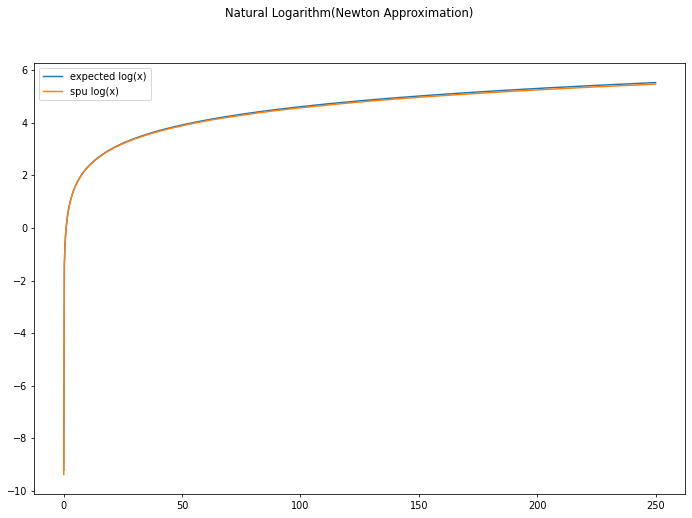

In [9]:
config = spu.RuntimeConfig(
    protocol=DEFAULT_SPU_PROTOCOL,
    field=DEFAULT_SPU_FIELD,
    fxp_fraction_bits=DEFAULT_SPU_FXP_FRACTION_BITS,
    fxp_log_mode=spu.RuntimeConfig.LOG_NEWTON,
)
simulator = pps.Simulator(3, config)

spu_log = pps.sim_jax(simulator, jnp.log)
x = np.linspace(0.0001, 250, num=1000)
expected_y = np.log(x)
y = spu_log(x)

fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle("Natural Logarithm(Newton Approximation)")
(line1,) = ax.plot(x, expected_y, label='expected log(x)')
(line2,) = ax.plot(x, y, label='spu log(x)')
ax.legend()
plt.show()

While, if out of valid input...

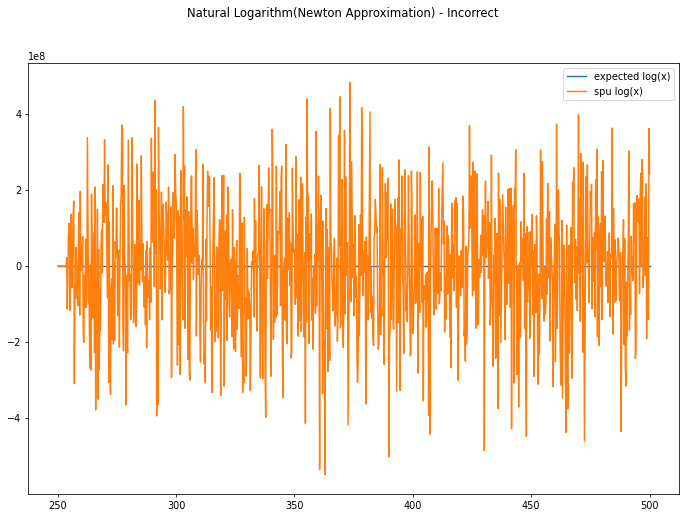

In [10]:
x = np.linspace(250, 500, num=1000)
expected_y = np.log(x)
y = spu_log(x)

fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle("Natural Logarithm(Newton Approximation) - Incorrect")
(line1,) = ax.plot(x, expected_y, label='expected log(x)')
(line2,) = ax.plot(x, y, label='spu log(x)')
ax.legend()
plt.show()

### Natural Exponential

The current implementation is based on Taylor approximation. The valid input range is around **(0, 10)**.

> **_NOTE:_**  Similar conclusion also applies to **exp2**.



findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

SPU exp(x) 执行时间： 0.022398948669433594 秒
SPU custom relu(x) 执行时间： 0.022062301635742188 秒


findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

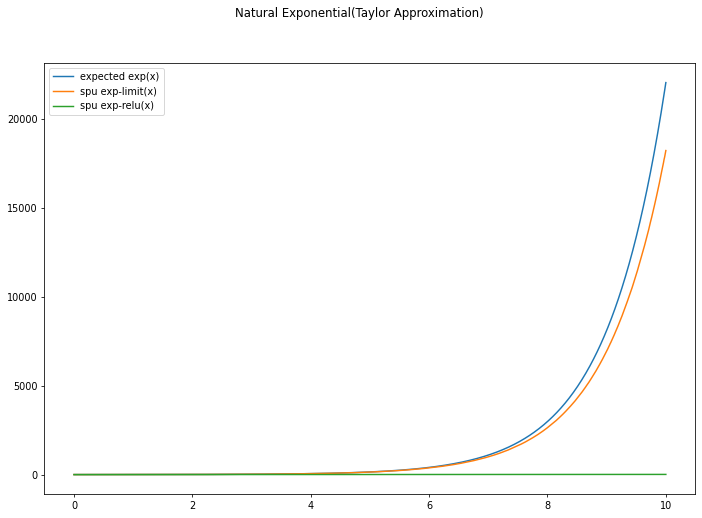

In [19]:
import time
def relu(x):
    return jnp.maximum(0,x)

config = spu.RuntimeConfig(
    protocol=DEFAULT_SPU_PROTOCOL,
    field=DEFAULT_SPU_FIELD,
    fxp_fraction_bits=DEFAULT_SPU_FXP_FRACTION_BITS,
)
simulator = pps.Simulator(3, config)

spu_exp = pps.sim_jax(simulator, jnp.exp)
x = np.linspace(0.0001, 10, num=1000)
expected_y = np.exp(x)
start_time_exp = time.time()
y = spu_exp(x)
end_time_exp = time.time()
exp_time = end_time_exp - start_time_exp

spu_relu = pps.sim_jax(simulator, relu)
start_time_relu = time.time()
y_relu = spu_relu(x)
end_time_relu = time.time()
relu_time = end_time_relu - start_time_relu
fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle("Natural Exponential(Taylor Approximation)")
(line1,) = ax.plot(x, expected_y, label='expected exp(x)')
(line2,) = ax.plot(x, y, label='spu exp-limit(x)')
(line3,) = ax.plot(x, y_relu, label='spu exp-relu(x)')
ax.legend()
print("SPU exp(x) 执行时间：", exp_time, "秒")
print("SPU custom relu(x) 执行时间：", relu_time, "秒")
# ax.axhline(y=exp_time, color='blue', linestyle='--', label=f"SPU exp-limit time: {exp_time:.4f} s")
# ax.axhline(y=relu_time, color='orange', linestyle='--', label=f"SPU exp-limit time: {relu_time:.4f} s")

plt.savefig("single.pdf", format="pdf")
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

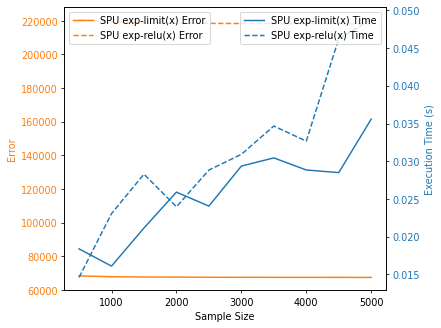

In [15]:
# 定义spu_exp和spu_relu的计算函数，并手动计算时间
def compute_time(func, x):
    start_time = time.time()
    result = func(x)
    end_time = time.time()
    execution_time = end_time - start_time
    return result, execution_time

# 计算spu_exp和spu_relu并统计时间和误差
sample_sizes = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
exp_errors = []
exp_times = []
relu_errors = []
relu_times = []

for sample_size in sample_sizes:
    x = np.linspace(0.0001, 15, num=sample_size)

    # 计算spu_exp并统计时间和误差
    spu_exp = pps.sim_jax(simulator, jnp.exp)
    expected_y = np.exp(x)
    y_exp, time_exp = compute_time(spu_exp, x)
    exp_times.append(time_exp)
    exp_error = np.mean(np.abs(expected_y - y_exp))
    exp_errors.append(exp_error)

    # 计算spu_relu并统计时间和误差
    spu_custom_relu = pps.sim_jax(simulator, relu)
    y_custom_relu, time_relu = compute_time(spu_custom_relu, x)
    relu_times.append(time_relu)
    relu_error = np.mean(np.abs(expected_y - y_custom_relu))
    relu_errors.append(relu_error)

# 可视化对比结果
fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Sample Size')
ax1.set_ylabel('Error', color=color)
ax1.plot(sample_sizes, exp_errors, label='SPU exp-limit(x) Error', color=color)
ax1.plot(sample_sizes, relu_errors, label='SPU exp-relu(x) Error', linestyle='dashed', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Execution Time (s)', color=color)  
ax2.plot(sample_sizes, exp_times, label='SPU exp-limit(x) Time', color=color)
ax2.plot(sample_sizes, relu_times, label='SPU exp-relu(x) Time', linestyle='dashed', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  
# plt.title('Comparison of SPU exp(x) and SPU custom relu(x)')
plt.savefig("time-acc-scale.pdf", format="pdf")
plt.show()

If input not in valid range, then...

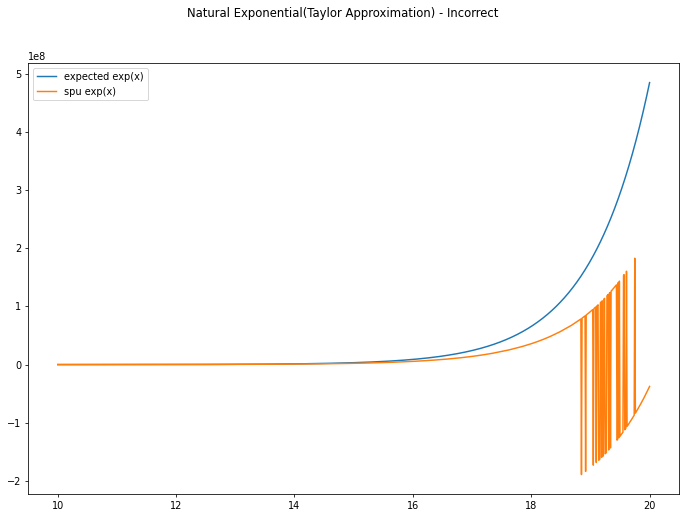

In [12]:
x = np.linspace(10, 20, num=1000)
expected_y = np.exp(x)
y = spu_exp(x)

fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle("Natural Exponential(Taylor Approximation) - Incorrect")
(line1,) = ax.plot(x, expected_y, label='expected exp(x)')
(line2,) = ax.plot(x, y, label='spu exp(x)')
ax.legend()
plt.show()

#### Another Choice: Pade Approximation

SPU also implements Pade Approximation which has a larger valid input range - **(0, 20)** but with slower computation speed.

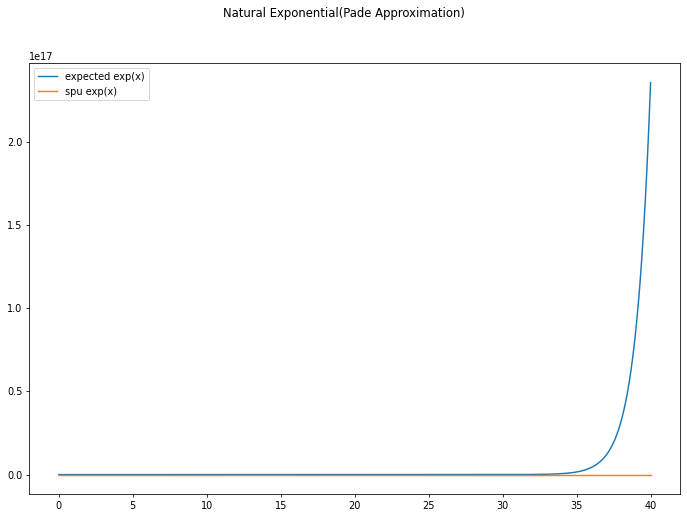

In [13]:
config = spu.RuntimeConfig(
    protocol=DEFAULT_SPU_PROTOCOL,
    field=DEFAULT_SPU_FIELD,
    fxp_fraction_bits=DEFAULT_SPU_FXP_FRACTION_BITS,
    fxp_exp_mode=spu.RuntimeConfig.EXP_PADE,
)
simulator = pps.Simulator(3, config)

spu_exp = pps.sim_jax(simulator, jnp.exp)
x = np.linspace(0.0001, 40, num=1000)
expected_y = np.exp(x)
y = spu_exp(x)

fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle("Natural Exponential(Pade Approximation)")
(line1,) = ax.plot(x, expected_y, label='expected exp(x)')
(line2,) = ax.plot(x, y, label='spu exp(x)')
ax.legend()
plt.show()

Let's check if input is larger than 20:

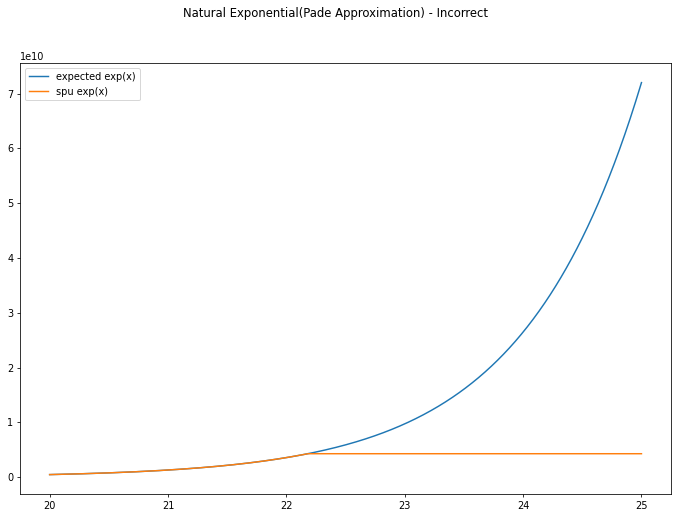

In [14]:
x = np.linspace(20, 25, num=1000)
expected_y = np.exp(x)
y = spu_exp(x)

fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle("Natural Exponential(Pade Approximation) - Incorrect")
(line1,) = ax.plot(x, expected_y, label='expected exp(x)')
(line2,) = ax.plot(x, y, label='spu exp(x)')
ax.legend()
plt.show()

### Hyperbolic Tangent

SPU uses Pade Approximation for implementation. The parameters refer to [Wolfram](https://www.wolframalpha.com/input?i=Pade+approximation+tanh%28x%29+order+5%2C5).
The valid input range is about **(-5,5)**.



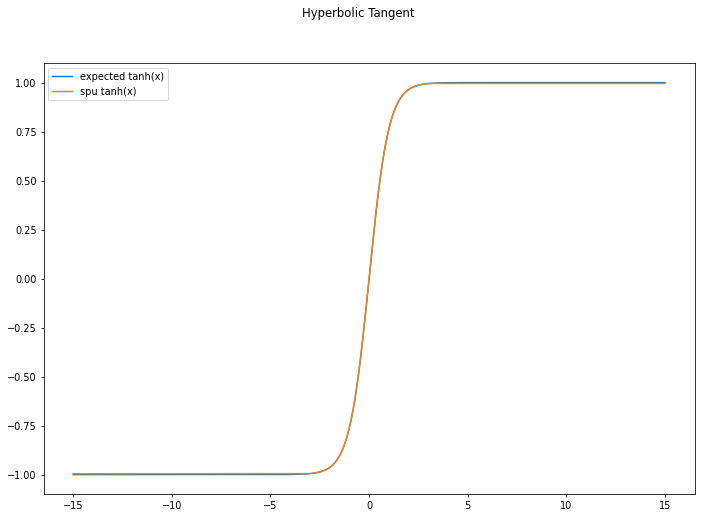

In [15]:
config = spu.RuntimeConfig(
    protocol=DEFAULT_SPU_PROTOCOL,
    field=DEFAULT_SPU_FIELD,
    fxp_fraction_bits=DEFAULT_SPU_FXP_FRACTION_BITS,
)
simulator = pps.Simulator(3, config)

spu_tanh = pps.sim_jax(simulator, jnp.tanh)
x = np.linspace(-15, 15, num=1000)
expected_y = np.tanh(x)
y = spu_tanh(x)

fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle("Hyperbolic Tangent")
(line1,) = ax.plot(x, expected_y, label='expected tanh(x)')
(line2,) = ax.plot(x, y, label='spu tanh(x)')
ax.legend()
plt.show()

## Binary Operator

### Div

SPU uses Goldschmidt's method to calculate division. Please refer to [Secure Computation With Fixed-Point Numbers](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.221.1305&rep=rep1&type=pdf) for details.

So we have a similar valid input range to **b**, which is **(-2\*\*fxp_fraction_bits, 2\*\*fxp_fraction_bits)**. Please check details at **reciprocal** part.

Besides, We do find some subtle pitfalls in real applications:

1. Overflow when numerator is large.

2. Some gap between numpy output.

**Rule of thumb**

We recommend users to try some actions if you come across "strange" outputs:

1. If **huge error** occurs(maybe even **opposite sign**):
   - It's common that numerator is **too large**, which leads to overflow.
   - Try **Larger** field(`FM128`) first. Larger field can accommodate larger number when fxp is fixed, so overflow can be avoided. But it will drag down the efficiency of **nearly all op** dramatically.
   
2. Else, if the gap is not very significant, you can try to modify another two parameters:

    a. Enlarging `fxp_fraction_bits`: it is an essential parameters for fixed-point arithmetic and will influence all the op associated with float-point. For fixed field, larger fxp can support more bits for fraction part which may give more precision. However, larger fxp will occupy the bits for integer part, and makes **overflow** easier.
    
    b. Enlarging `fxp_div_goldschmidt_iters`: the precision of Goldschmidt's method depends on iter numbers. So if you eager to more precise output, you can enlarge this parameter. But it's worthy to note that:
      - Larger this parameter, larger the cost of `Div` and all op containing it(like `Log` and `Tanh`).
      - The final precision is also influenced by field, fxp and even method for truncation. We only recommend to adjust this when you really care about the **high precision**(low absolute error) and other methods not work.


In [16]:
# some test case
x = np.array([[423871654, 423871654, 423871654], [419372966, 419372966, 419372966]])
y = np.array([[793, 793, 793], [778, 778, 778]])

In [17]:
# real div output
np.divide(x, y)

array([[534516.58764187, 534516.58764187, 534516.58764187],
       [539039.80205656, 539039.80205656, 539039.80205656]])

When numerator is very large($>2^{28}$ for `FM64` and `fxp=18`), then the integer part may overflow under large probability, and this brings huge error.

In [18]:
# use default setting as usual
config = spu.RuntimeConfig(
    protocol=DEFAULT_SPU_PROTOCOL,
    field=DEFAULT_SPU_FIELD,  # FM64
    fxp_fraction_bits=DEFAULT_SPU_FXP_FRACTION_BITS,  # 18fxp
)
simulator = pps.Simulator(3, config)

spu_div = pps.sim_jax(simulator, jnp.divide)

z = spu_div(x, y)

In [19]:
# get huge difference between real div output
z

array([[10221.877, 10223.456, 10221.877],
       [14744.429, 14744.429, 14745.99 ]], dtype=float32)

In this situation, **enlarging** field to `FM128` may be the only remedy.

In [20]:
config = spu.RuntimeConfig(
    protocol=DEFAULT_SPU_PROTOCOL,
    field=spu.FieldType.FM128,  # use larger field to accommodate larger numerator
    fxp_fraction_bits=18,  #  fix fxp as FM64 does
)
simulator = pps.Simulator(3, config)

spu_div = pps.sim_jax(simulator, jnp.divide)

z = spu_div(x, y)

In [21]:
# it behaves much better than FM64.
# but some minor error always exits
z

array([[534513.06, 534513.06, 534511.44],
       [539032.44, 539034.  , 539032.44]], dtype=float32)

Now, we try larger fxp.

In [22]:
config = spu.RuntimeConfig(
    protocol=DEFAULT_SPU_PROTOCOL,
    field=spu.FieldType.FM128,  # use larger field to accommodate larger numerator
    fxp_fraction_bits=40,  #  use larger fxp
)
simulator = pps.Simulator(3, config)

spu_div = pps.sim_jax(simulator, jnp.divide)

z = spu_div(x, y)

In [23]:
# seems similar to fxp=18
z

array([[534510.8, 534510.8, 534510.8],
       [539033. , 539033. , 539033. ]], dtype=float32)

As we have mentioned at **reciprocal** part, SPU implements reciprocal with Goldschmidt's method, so the final precision depends heavily on the **iter numbers**.

We first go through the algorithm quickly. let $r_i$ denote the approximation of reciprocal, $e_i$ be the relative error, then in one iter:
$$ r_i = r_{i-1}(1+e_i) \\
    e_{i+1} = e_i^2
$$

It's easy to prove that:

 1. To compute `Div(a, b)`, if we need $|\frac{a}{b} - r_i| \le 2^{-l}$, then $\lceil {log(\frac{l +log(a)}{\tau})} \rceil$ iterations should be done(we assume $|\frac{1}{b} - r_0| \le 2^{-\tau}$).In current implementation, we choose polynomial of degree 1 as the initial guess of reciprocal, which leads to $\tau \approx 3.5$.
 
2. The relative error $e_i = e_0^{2^i}$(same as `Div(a,b)`).

Although some other factors like fxp and truncation will also bring into some errors, the above error analysis can still give readers some recommendations when deciding `fxp_div_goldschmidt_iters`.

In [24]:
# Now, we enlarge the goldschmidt_iters
config = spu.RuntimeConfig(
    protocol=DEFAULT_SPU_PROTOCOL,
    field=spu.FieldType.FM128,
    fxp_fraction_bits=18,
    fxp_div_goldschmidt_iters=3,  # set iters to 3
)
simulator = pps.Simulator(3, config)

spu_div = pps.sim_jax(simulator, jnp.divide)

z = spu_div(x, y)

In [25]:
# now the gap between numpy is very small
z

array([[534517.75, 534516.2 , 534514.6 ],
       [539037.1 , 539038.7 , 539037.1 ]], dtype=float32)

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

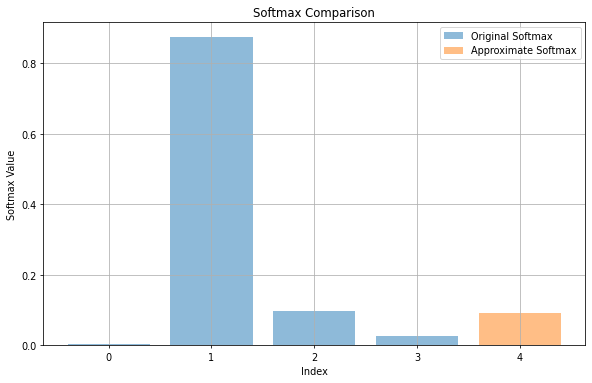

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x)

def approx_softmax(x):
    return x * (1/(1+np.exp(0.071355 * x**3 + 1.595769 * x)))

# Generate some random input values
np.random.seed(42)
x = np.random.rand(5) * 10  # Generate a random vector of length 5

# Compute softmax values
softmax_values = softmax(x)
approx_softmax_values = approx_softmax(x)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(x)), softmax_values, label='Original Softmax', alpha=0.5)
plt.bar(np.arange(len(x)), approx_softmax_values, label='Approximate Softmax', alpha=0.5)
plt.title("Softmax Comparison")
plt.xlabel("Index")
plt.ylabel("Softmax Value")
plt.legend()
plt.grid(True)
plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

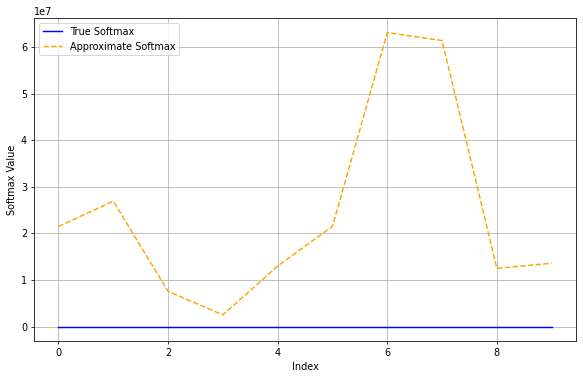

In [40]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

# 定义 softmax 近似方法
def exp_approx(x):
    iterations = 9  # 迭代次数
    result = 1.0 + x / (1 << iterations)  # 初始化结果
    for _ in range(iterations):
        result *= result  # 平方
    return result

def reciprocal_approx(x):
    iterations = 4  # 迭代次数
    result = 1.0 + x / (1 << iterations)  # 初始化结果
    for _ in range(iterations):
        result *= 2 - x * result  # 牛顿-拉弗森迭代
    return result

def softmax_approx(x):
    maximum_value = jnp.max(x)
    logits = x - maximum_value
    numerator = exp_approx(logits)
    inv_denominator = jnp.sum(numerator)
    return numerator * reciprocal_approx(inv_denominator)

def softmax_approx_v1(x):
    maximum_value = jnp.max(x)
    logits = x - maximum_value
    numerator = jnp.maximum(0,logits)
    inv_denominator = jnp.sum(numerator)
    return numerator * reciprocal_approx(inv_denominator)


# # 生成一个10维的随机向量
# np.random.seed(0)
x = np.random.randn(10)

# 计算真实的 softmax
true_softmax = jax.nn.softmax(x)

# 计算近似的 softmax
approx_softmax = softmax_approx(x)

config = spu.RuntimeConfig(
    protocol=DEFAULT_SPU_PROTOCOL,
    field=DEFAULT_SPU_FIELD,
    fxp_fraction_bits=DEFAULT_SPU_FXP_FRACTION_BITS,
)
simulator = pps.Simulator(3, config)

spu_log = pps.sim_jax(simulator, softmax_approx)
# expected_y = np.log(x)
y = spu_log(x)

# 绘制对比图
plt.figure(figsize=(10, 6))
plt.plot(range(10), true_softmax, label='True Softmax', linestyle='-', color='blue')
plt.plot(range(10), y, label='Approximate Softmax', linestyle='--', color='orange')
# plt.title('Comparison of True and Approximate Softmax')
plt.xlabel('Index')
plt.ylabel('Softmax Value')
plt.legend()
plt.grid(True)
plt.savefig("softmax-approx.pdf",format="pdf")
plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf


[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]
[0.18183723 0.04648905 0.08291347 0.2929356  0.20166695 0.01172568
 0.08057174 0.02678126 0.028102   0.046977  ]
[-16002335.    -4078556.5   -7286955.5  -25784896.   -17749090.
  -1021699.25  -7080591.5   -2344179.8   -2460325.    -4121502.5 ]


findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
findfont: Generic family 'sans-serif' not found because none of the following families were found: /home/liujing/miniconda3/envs/sf/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei

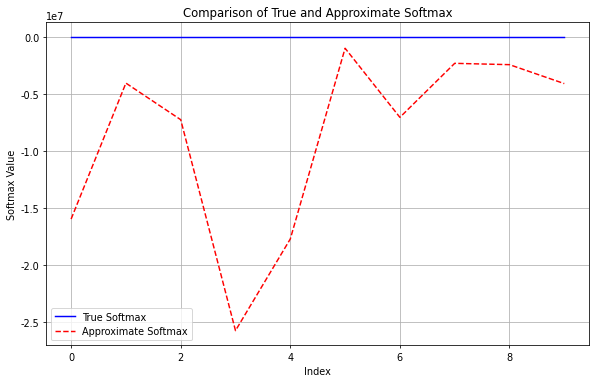

In [48]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

# 定义softmax近似函数
def exp_approx(x):
    iterations = 9  # 迭代次数
    result = 1.0 + x / (1 << iterations)  # 初始化结果
    for _ in range(iterations):
        result *= result  # 平方运算
    return result

def reciprocal_approx(x):
    iterations = 4  # 迭代次数
    result = 1.0 + x / (1 << iterations)  # 初始化结果
    for _ in range(iterations):
        result *= 2 - x * result  # 牛顿-拉夫逊迭代
    return result

def softmax_approx(x):
    maximum_value = jnp.max(x)  # 最大值
    logits = x - maximum_value  # 计算logits
    numerator = exp_approx(logits)  # 计算分子
    inv_denominator = reciprocal_approx(jnp.sum(numerator))  # 计算分母的倒数
    return numerator * inv_denominator  # 返回softmax值

def softmax(x):
    """Compute the softmax of vector x."""
    exp_x = np.exp(x)
    softmax_x = exp_x / np.sum(exp_x)
    return softmax_x

# 生成一个10维的随机向量
np.random.seed(0)
x = np.random.randn(10)
print(x)

# 计算真实的 softmax
true_softmax = softmax(x)
print(true_softmax)


# 计算近似的 softmax
approx_softmax = softmax_approx(x)
print(approx_softmax)

# 绘制对比图
plt.figure(figsize=(10, 6))
plt.plot(range(10), true_softmax, label='True Softmax', linestyle='-', color='blue')
plt.plot(range(10), approx_softmax, label='Approximate Softmax', linestyle='--', color='red')
plt.title('Comparison of True and Approximate Softmax')
plt.xlabel('Index')
plt.ylabel('Softmax Value')
plt.legend()
plt.grid(True)
plt.show()
